### Import Libraries

In [1]:
import glob

import numpy as np 
import pandas as pd
from astropy.io import fits 

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from scipy.stats import poisson

### Load Fits File 

1. Load an example fits file (Fits file used for fig. 2 in paper)



2. Read and Inspect



3. Select the CR + BKG Component

In [3]:
filepath = './Example-Data'

CR_ext_fits1_C1 = fits.open(filepath + '/Image249_extended_source-PL+CR+.fits')

print (CR_ext_fits1_C1.info())
print ('\n')
print (CR_ext_fits1_C1[0].header)

Filename: ./Example-Data/Image249_extended_source-PL+CR+.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (70, 70, 4)   float64   
  1  CRBKG         1 ImageHDU        22   (70, 70, 4)   float64   
  2  SRC+CR        1 ImageHDU        26   (70, 70, 4)   float64   
  3  SOURCE        1 ImageHDU        26   (70, 70, 60)   float64   
  4  CRBKG         1 ImageHDU        22   (70, 70, 60)   float64   
  5  SRC+CR        1 ImageHDU        26   (70, 70, 60)   float64   
None


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   70                                                  NAXIS2  =                   70                                                  NAXIS3  =                    4                                  

In [4]:
print ('Extension (sigma): ', CR_ext_fits1_C1[0].header['SIGMA'], '\n', 
       'Prefac (K_0): ', CR_ext_fits1_C1[0].header['PREFAC'], '\n', 
       'Pivot En in MeV (E_0): ', CR_ext_fits1_C1[0].header['PIVEN'], '\n', 
       'Spec Index: (gamma): ', CR_ext_fits1_C1[0].header['INDEX'])

Extension (sigma):  0.115 
 Prefac (K_0):  1.53900678135386e-18 
 Pivot En in MeV (E_0):  1000000.0 
 Spec Index: (gamma):  -2.308519233083067


In [5]:
def fits_data_reshape(f_data):
    f_data_0 = f_data[2].data
    f_data_0_reshape = np.moveaxis(f_data_0, 0, -1)
    return f_data_0_reshape


def bkg_CR_data_reshape(f_data):
    f_data_CR, f_data_bkg = f_data[0].data, f_data[1].data
    f_data_CR_reshape = np.moveaxis(f_data_CR, 0, -1)
    f_data_bkg_reshape = np.moveaxis(f_data_bkg, 0, -1)
    return f_data_CR_reshape, f_data_bkg_reshape



ext_C1_reshape = fits_data_reshape(CR_ext_fits1_C1)



ext_C1_re_CR, ext_C1_re_bkg = bkg_CR_data_reshape(CR_ext_fits1_C1)#not used


print (ext_C1_reshape.shape)
print ('check bkg and CR data shape; ', ext_C1_re_bkg.shape, ext_C1_re_CR.shape)

(70, 70, 4)
check bkg and CR data shape;  (70, 70, 4) (70, 70, 4)


### Assimov Images at 4 Energy Bins

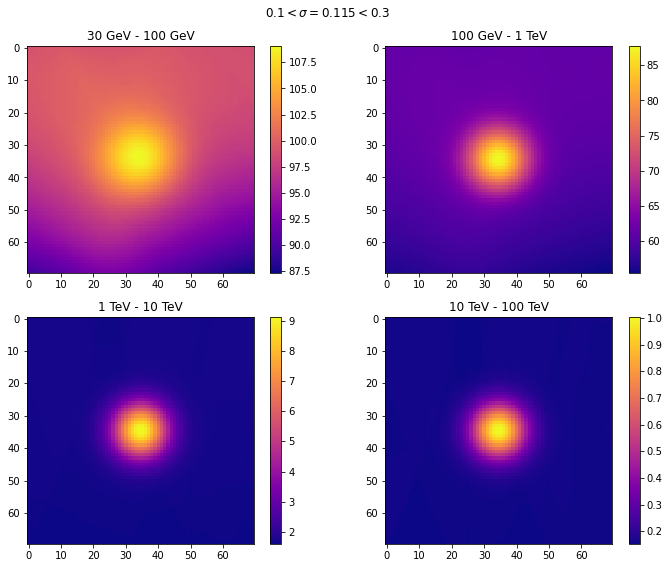

In [6]:
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(221)
plt.imshow(ext_C1_reshape[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('30 GeV - 100 GeV')
fig.add_subplot(222)
plt.imshow(ext_C1_reshape[:, :, 1], cmap='plasma')
plt.colorbar()
plt.title('100 GeV - 1 TeV')
fig.add_subplot(223)
plt.imshow(ext_C1_reshape[:, :, 2], cmap='plasma')
plt.colorbar()
plt.title('1 TeV - 10 TeV')
fig.add_subplot(224)
plt.imshow(ext_C1_reshape[:, :, 3], cmap='plasma')
plt.colorbar()
plt.title('10 TeV - 100 TeV')
plt.suptitle(r'$0.1<\sigma=0.115<0.3$')
plt.tight_layout()
# plt.savefig('./C1_Source_Assimov_1.png', dpi=200)
plt.show()

### Poisson Images at 4 Energy Bins

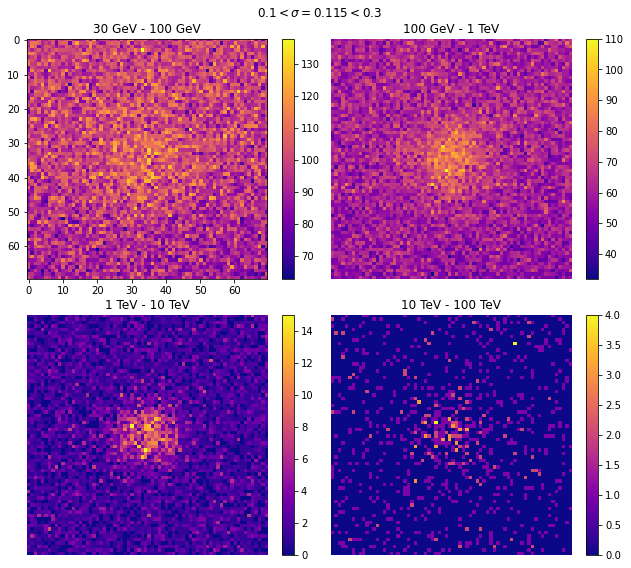

In [7]:
fig = plt.figure(figsize=(9, 8))
fig.add_subplot(221)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 0]), cmap='plasma')
plt.colorbar()
plt.title('30 GeV - 100 GeV')
fig.add_subplot(222)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 1]), cmap='plasma')
plt.colorbar()
plt.title('100 GeV - 1 TeV')
plt.axis('off')
fig.add_subplot(223)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 2]), cmap='plasma')
plt.colorbar()
plt.title('1 TeV - 10 TeV')
plt.axis('off')
fig.add_subplot(224)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 3]), cmap='plasma')
plt.colorbar()
plt.title('10 TeV - 100 TeV')
plt.axis('off')
plt.suptitle(r'$0.1<\sigma=0.115<0.3$')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01, hspace=0.15)
# plt.savefig('./C1_Source_Poisson_1.png', dpi=200)
plt.show()

#### Images Used in Example Neural Net Architecture (Fig. 3)

First two bins of the image above

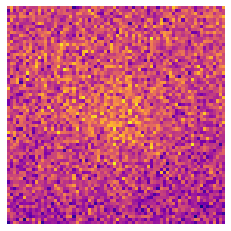

In [8]:
fig = plt.figure(figsize=(4, 4))
fig.add_subplot(111)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 0]), cmap='plasma')
plt.axis('off')
# plt.savefig('./C1-E0-Neural1.png', dpi=200)
plt.show()

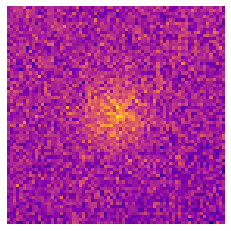

In [9]:
fig = plt.figure(figsize=(4, 4))
fig.add_subplot(111)
plt.imshow(poisson.rvs(ext_C1_reshape[:, :, 1]), cmap='plasma')
plt.axis('off')
# plt.savefig('./C1-E1-Neural1.png', dpi=200)
plt.show()

### Check Fits to Npy Code

Accompanying [fits_to_npy script](https://github.com/suvoooo/CTA-SourceExtension2023/blob/main/scripts/fits_to_npy_CTA_extent_sel.py)



In [11]:
def gen_func_save(filename):
    '''
    input: fits file generated via ctools
    output: src + CR at 4 different bins, corresponding filename
    '''
    fits_file = fits.open(filename)
    image_data = fits_file[2].data # SRC + CR (4, 70, 70)
    image_data = np.moveaxis(image_data, 0, -1)
    image_data_bin_0 = image_data[:, :, 0]
    image_data_bin_1 = image_data[:, :, 1]
    image_data_bin_2 = image_data[:, :, 2]
    image_data_bin_3 = image_data[:, :, 3]
    poisson_image_0 = poisson.rvs(image_data_bin_0)
    poisson_image_1 = poisson.rvs(image_data_bin_1)
    poisson_image_2 = poisson.rvs(image_data_bin_2)
    poisson_image_3 = poisson.rvs(image_data_bin_3)

    filename_strip = filename.split('/')[-1].replace('fits', 'npy')
    
    return poisson_image_0, poisson_image_1, poisson_image_2, poisson_image_3, filename_strip  
    # return with added poisson noise & filenames
    
    
def save_poi_im_files(file_list , save_dir):
    for i in range(len(file_list)):
        fits_file = fits.open(file_list[i])
        sigma = fits_file[0].header['SIGMA']
        if sigma >=0.03 and sigma <=0.1:
            poi_im0, poi_im1, poi_im2, poi_im3, f_name = gen_func_save(file_list[i])
            print('poi im shape:', poi_im0.shape, poi_im1.shape)
            print ('check_filename: ', f_name)
            f_name_new0 = f_name.replace('+', '_').replace('source-', 'C0_E0_')
            f_name_new1 = f_name.replace('+', '_').replace('source-', 'C0_E1_')
            f_name_new2 = f_name.replace('+', '_').replace('source-', 'C0_E2_')
            f_name_new3 = f_name.replace('+', '_').replace('source-', 'C0_E3_')
            np.save(save_dir + f_name_new0, poi_im0)
            np.save(save_dir + f_name_new1, poi_im1)
            np.save(save_dir + f_name_new2, poi_im2)
            np.save(save_dir + f_name_new3, poi_im3)
        if sigma >0.1 and sigma <=0.3:
            poi_im0, poi_im1, poi_im2, poi_im3, f_name = gen_func_save(file_list[i])
            print('poi im shape:', poi_im0.shape, poi_im1.shape)
            print ('check_filename: ', f_name)
            f_name_new0 = f_name.replace('+', '_').replace('source-', 'C1_E0_')
            f_name_new1 = f_name.replace('+', '_').replace('source-', 'C1_E1_')
            f_name_new2 = f_name.replace('+', '_').replace('source-', 'C1_E2_')
            f_name_new3 = f_name.replace('+', '_').replace('source-', 'C1_E3_')
            np.save(save_dir + f_name_new0, poi_im0)
            np.save(save_dir + f_name_new1, poi_im1)
            np.save(save_dir + f_name_new2, poi_im2)
            np.save(save_dir + f_name_new3, poi_im3)
        if sigma >0.3 and sigma <=0.999:
            poi_im0, poi_im1, poi_im2, poi_im3, f_name = gen_func_save(file_list[i])
            print('poi im shape:', poi_im0.shape, poi_im1.shape)
            print ('check_filename: ', f_name)
            f_name_new0 = f_name.replace('+', '_').replace('source-', 'C2_E0_')
            f_name_new1 = f_name.replace('+', '_').replace('source-', 'C2_E1_')
            f_name_new2 = f_name.replace('+', '_').replace('source-', 'C2_E2_')
            f_name_new3 = f_name.replace('+', '_').replace('source-', 'C2_E3_')
            np.save(save_dir + f_name_new0, poi_im0)
            np.save(save_dir + f_name_new1, poi_im1)
            np.save(save_dir + f_name_new2, poi_im2)
            np.save(save_dir + f_name_new3, poi_im3)        
    return True   

all_files_list = glob.glob(filepath + '/*.fits')

print (all_files_list)

save_filepath = filepath

save_poi_im_files(all_files_list, save_filepath)  

['./Example-Data/Image249_extended_source-PL+CR+.fits', './Example-Data/Image497_extended_source-PL+CR+.fits']
poi im shape: (70, 70) (70, 70)
check_filename:  Image249_extended_source-PL+CR+.npy
poi im shape: (70, 70) (70, 70)
check_filename:  Image497_extended_source-PL+CR+.npy


True

In [19]:
### load the npy files

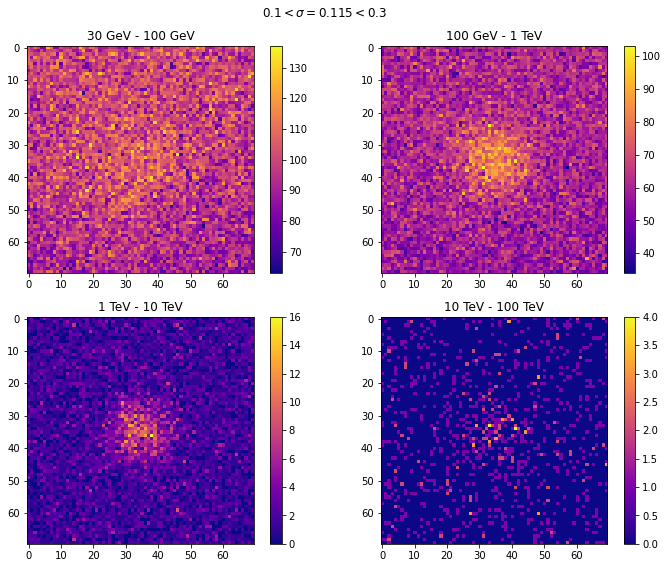

In [12]:
C1_E0_poisson_npy = np.load(filepath + '/Image249_extended_C1_E0_PL_CR_.npy')
C1_E0_poisson_npy_re = np.expand_dims(C1_E0_poisson_npy, axis=-1)

C1_E1_poisson_npy = np.load(filepath + '/Image249_extended_C1_E1_PL_CR_.npy')
C1_E1_poisson_npy_re = np.expand_dims(C1_E1_poisson_npy, axis=-1)

C1_E2_poisson_npy = np.load(filepath + '/Image249_extended_C1_E2_PL_CR_.npy')
C1_E2_poisson_npy_re = np.expand_dims(C1_E2_poisson_npy, axis=-1)

C1_E3_poisson_npy = np.load(filepath + '/Image249_extended_C1_E3_PL_CR_.npy')
C1_E3_poisson_npy_re = np.expand_dims(C1_E3_poisson_npy, axis=-1)

######################################################
# this should be same as the poisson images before
######################################################
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(221)
plt.imshow(C1_E0_poisson_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('30 GeV - 100 GeV')
fig.add_subplot(222)
plt.imshow(C1_E1_poisson_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('100 GeV - 1 TeV')
fig.add_subplot(223)
plt.imshow(C1_E2_poisson_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('1 TeV - 10 TeV')
fig.add_subplot(224)
plt.imshow(C1_E3_poisson_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('10 TeV - 100 TeV')
plt.suptitle(r'$0.1<\sigma=0.115<0.3$')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------ 

### Check Augmentation Used

1. Flip UD


2. Flip LR


3. Rotate $90^{\circ}$ Counter-Clockwise


Accompanying [dataloader script](https://github.com/suvoooo/CTA-SourceExtension2023/blob/main/scripts/classification_DataLoader_CTA_Ext.py) where we perform augmentation using the function `aug_ims_source_CTA`

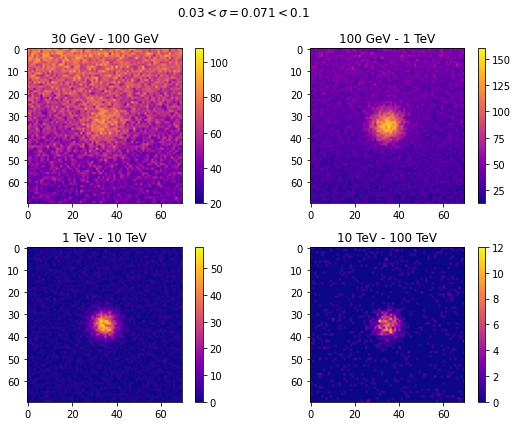

In [15]:
C0_check_E0_npy = np.load(filepath + '/Image497_extended_C0_E0_PL_CR_.npy')
C0_check_E0_npy_re = np.expand_dims(C0_check_E0_npy, axis=-1)
C0_check_E1_npy = np.load(filepath + '/Image497_extended_C0_E1_PL_CR_.npy')
C0_check_E1_npy_re = np.expand_dims(C0_check_E1_npy, axis=-1)
C0_check_E2_npy = np.load(filepath + '/Image497_extended_C0_E2_PL_CR_.npy')
C0_check_E2_npy_re = np.expand_dims(C0_check_E2_npy, axis=-1)
C0_check_E3_npy = np.load(filepath + '/Image497_extended_C0_E3_PL_CR_.npy')
C0_check_E3_npy_re = np.expand_dims(C0_check_E3_npy, axis=-1)



fig = plt.figure(figsize=(8, 6))
fig.add_subplot(221)
plt.imshow(C0_check_E0_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('30 GeV - 100 GeV')
fig.add_subplot(222)
plt.imshow(C0_check_E1_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('100 GeV - 1 TeV')
fig.add_subplot(223)
plt.imshow(C0_check_E2_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('1 TeV - 10 TeV')
fig.add_subplot(224)
plt.imshow(C0_check_E3_npy_re[:, :, 0], cmap='plasma')
plt.colorbar()
plt.title('10 TeV - 100 TeV')
plt.suptitle(r'$0.03<\sigma=0.071<0.1$')
plt.tight_layout()
plt.show()

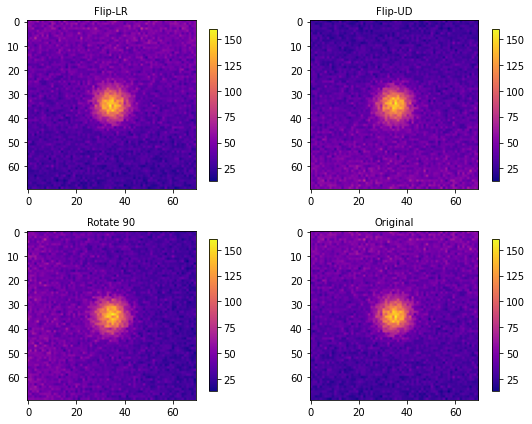

In [16]:
C0_check_E1_npy_flipUD = np.flipud(C0_check_E1_npy_re)
C0_check_E1_npy_flipLR = np.fliplr(C0_check_E1_npy_re)
C0_check_E1_npy_rot90 = np.rot90(C0_check_E1_npy_re, k=1, axes=(0, 1))

fig = plt.figure(figsize=(8, 6))
fig.add_subplot(221)
plt.imshow(C0_check_E1_npy_flipLR[:, :, 0], cmap='plasma')
plt.colorbar(shrink=0.9)
plt.title('Flip-LR', fontsize=10)
fig.add_subplot(222)
plt.imshow(C0_check_E1_npy_flipUD[:, :, 0], cmap='plasma', )
plt.title('Flip-UD', fontsize=10)
plt.colorbar(shrink=0.9)
fig.add_subplot(223)
plt.imshow(C0_check_E1_npy_rot90[:, :, 0], cmap='plasma',)
plt.colorbar(shrink=0.9)
plt.title('Rotate 90', fontsize=10)
fig.add_subplot(224)
plt.imshow(C0_check_E1_npy_re[:, :, 0], cmap='plasma',)
plt.colorbar(shrink=0.9)
plt.title('Original', fontsize=10)
plt.tight_layout()
plt.show()